# AOU University
# WeCare: Graduation project
# Name: Mohamed Tarek Mohamed Elsaid
# ID: 2051711398
# Heart disease Notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
import pickle
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset 
data = pd.read_csv("heart.csv")  
data.head()  

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [4]:
n_cols = {'cp':'Chest Pain Type (CP)',
          'trestbps':'Resting Blood Pressure (trestbps)',
          'chol':'Serum Cholestoral (chol) mg/dl',
          'fbs':  'Fasting Blood Sugar (fbs) > 120 mg/dl',
          'restecg': 'Resting Electrocardiographic Results (restecg)',
          'thalach' : 'Maximum Heart Rate Achieved (thalach)',
          'exang': 'Exercise Induced Angina (exang)',
          'oldpeak' : 'ST depression (oldpeak)' ,
          'slope' : 'Slope of the ST Segment (slope)',
          'ca' : 'Number of Major Vessels (ca)',
          'thal' : 'Thal'}

data.rename(columns=n_cols ,inplace=True)
data.head()

age  sex  Chest Pain Type (CP)  Resting Blood Pressure (trestbps)  \
0   52    1                     0                                125   
1   53    1                     0                                140   
2   70    1                     0                                145   
3   61    1                     0                                148   
4   62    0                     0                                138   

   Serum Cholestoral (chol) mg/dl  Fasting Blood Sugar (fbs) > 120 mg/dl  \
0                             212                                      0   
1                             203                                      1   
2                             174                                      0   
3                             203                                      0   
4                             294                                      1   

   Resting Electrocardiographic Results (restecg)  \
0                                               1   
1                                               0   
2                                               1   
3                                               1   
4                                               1   

   Maximum Heart Rate Achieved (thalach)  Exercise Induced Angina (exang)  \
0                                    168                                0   
1                                    155                                1   
2                                    125                                1   
3                                    161                                0   
4                                    106                                0   

   ST depression (oldpeak)  Slope of the ST Segment (slope)  \
0                      1.0                                2   
1                      3.1                                0   
2                      2.6                                0   
3                      0.0                                2   
4                      1.9                                1   

   Number of Major Vessels (ca)  Thal  target  
0                             2     3       0  
1                             0     3       0  
2                             0     3       0  
3                             1     3       0  
4                             3     2       0

In [5]:
data.shape

(1025, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             1025 non-null   int64  
 1   sex                                             1025 non-null   int64  
 2   Chest Pain Type (CP)                            1025 non-null   int64  
 3   Resting Blood Pressure (trestbps)               1025 non-null   int64  
 4   Serum Cholestoral (chol) mg/dl                  1025 non-null   int64  
 5   Fasting Blood Sugar (fbs) > 120 mg/dl           1025 non-null   int64  
 6   Resting Electrocardiographic Results (restecg)  1025 non-null   int64  
 7   Maximum Heart Rate Achieved (thalach)           1025 non-null   int64  
 8   Exercise Induced Angina (exang)                 1025 non-null   int64  
 9   ST depression (oldpeak)                  

In [7]:
data.describe().T

count        mean        std  \
age                                             1025.0   54.434146   9.072290   
sex                                             1025.0    0.695610   0.460373   
Chest Pain Type (CP)                            1025.0    0.942439   1.029641   
Resting Blood Pressure (trestbps)               1025.0  131.611707  17.516718   
Serum Cholestoral (chol) mg/dl                  1025.0  246.000000  51.592510   
Fasting Blood Sugar (fbs) > 120 mg/dl           1025.0    0.149268   0.356527   
Resting Electrocardiographic Results (restecg)  1025.0    0.529756   0.527878   
Maximum Heart Rate Achieved (thalach)           1025.0  149.114146  23.005724   
Exercise Induced Angina (exang)                 1025.0    0.336585   0.472772   
ST depression (oldpeak)                         1025.0    1.071512   1.175053   
Slope of the ST Segment (slope)                 1025.0    1.385366   0.617755   
Number of Major Vessels (ca)                    1025.0    0.754146   1.030798   
Thal                                            1025.0    2.323902   0.620660   
target                                          1025.0    0.513171   0.500070   

                                                  min    25%    50%    75%  \
age                                              29.0   48.0   56.0   61.0   
sex                                               0.0    0.0    1.0    1.0   
Chest Pain Type (CP)                              0.0    0.0    1.0    2.0   
Resting Blood Pressure (trestbps)                94.0  120.0  130.0  140.0   
Serum Cholestoral (chol) mg/dl                  126.0  211.0  240.0  275.0   
Fasting Blood Sugar (fbs) > 120 mg/dl             0.0    0.0    0.0    0.0   
Resting Electrocardiographic Results (restecg)    0.0    0.0    1.0    1.0   
Maximum Heart Rate Achieved (thalach)            71.0  132.0  152.0  166.0   
Exercise Induced Angina (exang)                   0.0    0.0    0.0    1.0   
ST depression (oldpeak)                           0.0    0.0    0.8    1.8   
Slope of the ST Segment (slope)                   0.0    1.0    1.0    2.0   
Number of Major Vessels (ca)                      0.0    0.0    0.0    1.0   
Thal                                              0.0    2.0    2.0    3.0   
target                                            0.0    0.0    1.0    1.0   

                                                  max  
age                                              77.0  
sex                                               1.0  
Chest Pain Type (CP)                              3.0  
Resting Blood Pressure (trestbps)               200.0  
Serum Cholestoral (chol) mg/dl                  564.0  
Fasting Blood Sugar (fbs) > 120 mg/dl             1.0  
Resting Electrocardiographic Results (restecg)    2.0  
Maximum Heart Rate Achieved (thalach)           202.0  
Exercise Induced Angina (exang)                   1.0  
ST depression (oldpeak)                           6.2  
Slope of the ST Segment (slope)                   2.0  
Number of Major Vessels (ca)                      4.0  
Thal                                              3.0  
target                                            1.0

In [8]:
#EDA
data.isnull().sum()

age                                               0
sex                                               0
Chest Pain Type (CP)                              0
Resting Blood Pressure (trestbps)                 0
Serum Cholestoral (chol) mg/dl                    0
Fasting Blood Sugar (fbs) > 120 mg/dl             0
Resting Electrocardiographic Results (restecg)    0
Maximum Heart Rate Achieved (thalach)             0
Exercise Induced Angina (exang)                   0
ST depression (oldpeak)                           0
Slope of the ST Segment (slope)                   0
Number of Major Vessels (ca)                      0
Thal                                              0
target                                            0
dtype: int64

In [9]:
data['Chest Pain Type (CP)']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    0
1024    0
Name: Chest Pain Type (CP), Length: 1025, dtype: int64

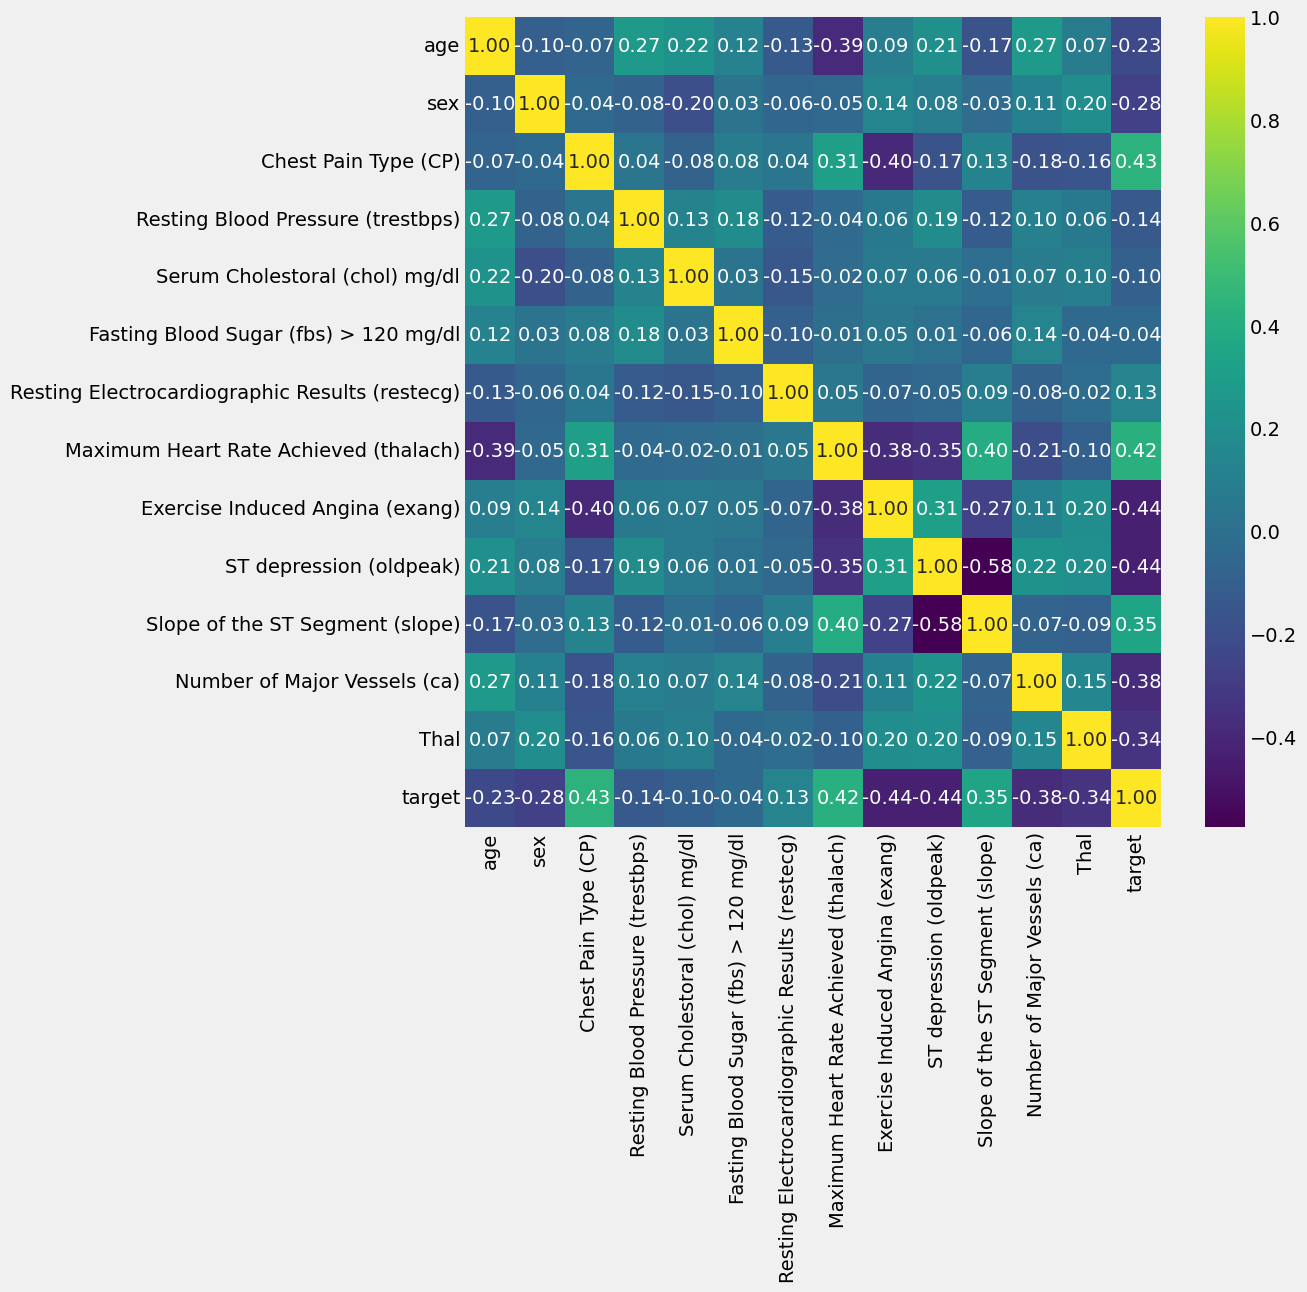

In [10]:
#Colerration check.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True,fmt = ".2f",cmap='viridis')
plt.show()

In [11]:
#Clculate age
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.43414634146342


In [12]:
#Prepare ages for a bie chart
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Old = data[(data.age>55)]

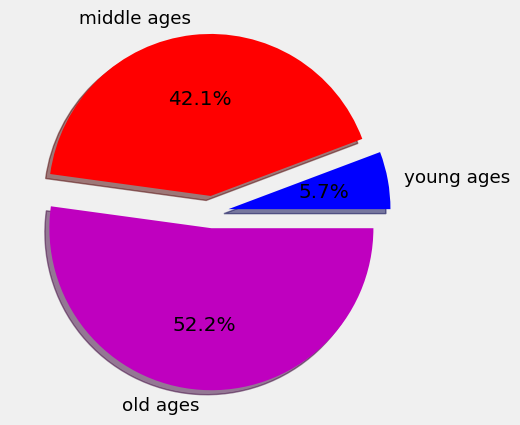

In [13]:
plt.style.use('fivethirtyeight')
colors = ['b','r','m']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['young ages','middle ages','old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%')
plt.show()

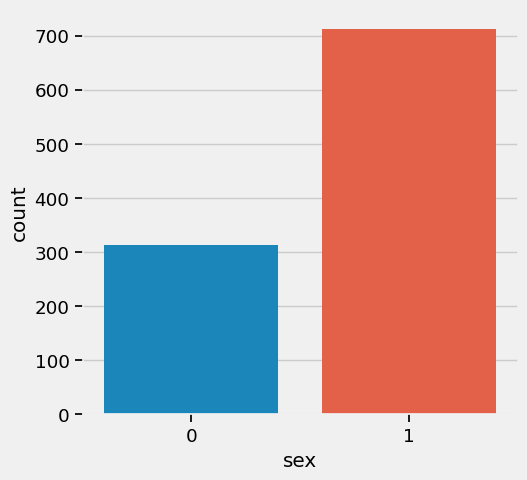

In [14]:
#Sex 
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=data)
plt.show()

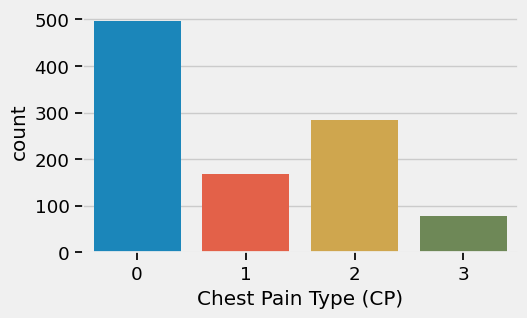

In [15]:
#chest 
plt.figure(figsize=(5,3))
sns.countplot(x='Chest Pain Type (CP)', data=data)
plt.show()

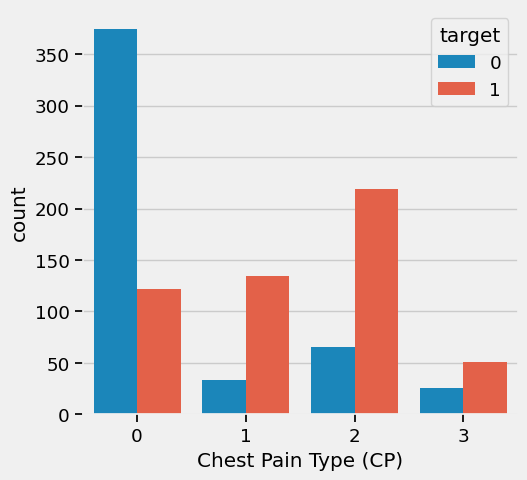

In [16]:
#Chest with Heart 
plt.figure(figsize=(5,5))
sns.countplot(x='Chest Pain Type (CP)', data=data , hue='target')
plt.show()

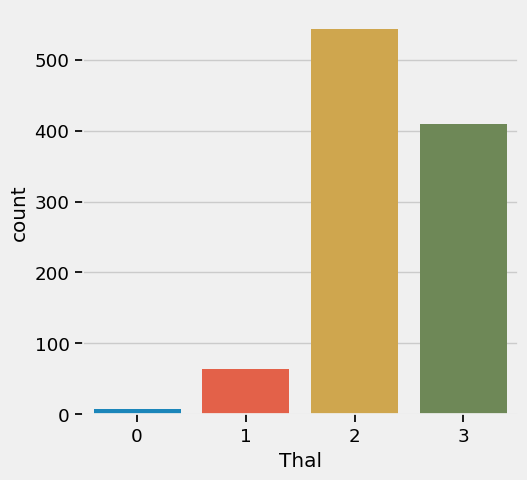

In [17]:
#Thal
plt.figure(figsize=(5,5))
sns.countplot(x='Thal', data=data)
plt.show()

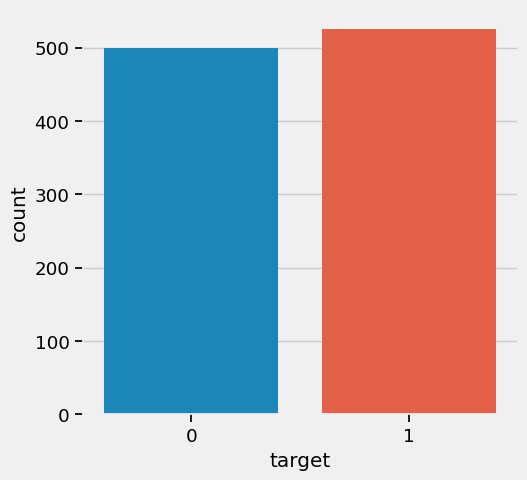

In [18]:
#Finally Heart 
plt.figure(figsize=(5,5))
sns.countplot(x='target', data=data)
plt.show()

In [19]:
data.columns

Index(['age', 'sex', 'Chest Pain Type (CP)',
       'Resting Blood Pressure (trestbps)', 'Serum Cholestoral (chol) mg/dl',
       'Fasting Blood Sugar (fbs) > 120 mg/dl',
       'Resting Electrocardiographic Results (restecg)',
       'Maximum Heart Rate Achieved (thalach)',
       'Exercise Induced Angina (exang)', 'ST depression (oldpeak)',
       'Slope of the ST Segment (slope)', 'Number of Major Vessels (ca)',
       'Thal', 'target'],
      dtype='object')

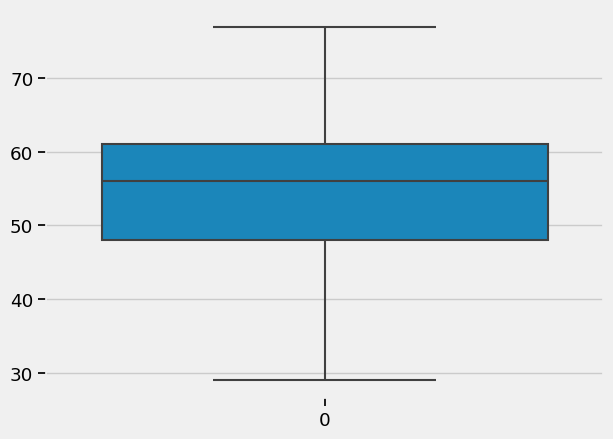

In [20]:
#outliers
sns.boxplot(data['age'])
plt.show()

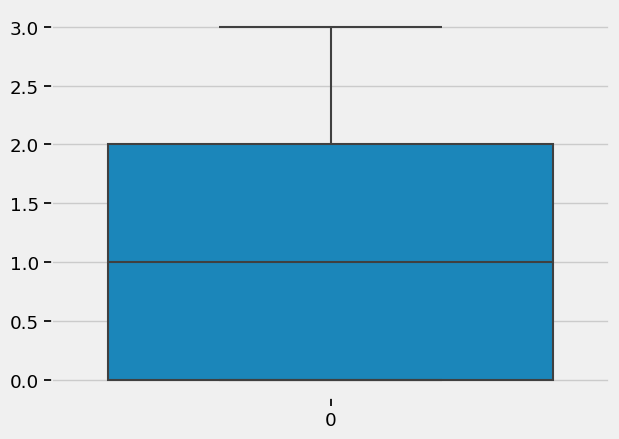

In [21]:
#outliers
sns.boxplot(data['Chest Pain Type (CP)'])
plt.show()

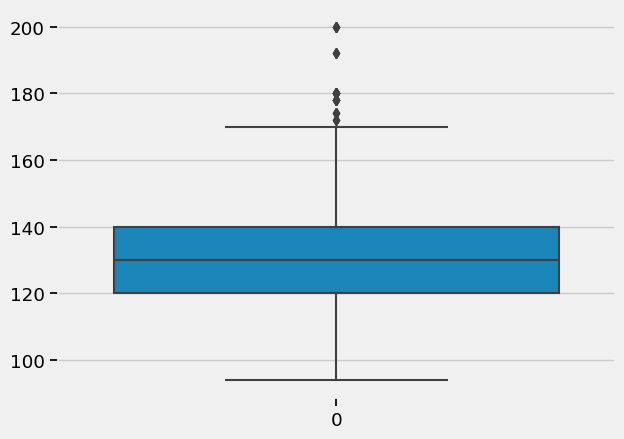

In [22]:
#outliers
sns.boxplot(data['Resting Blood Pressure (trestbps)'])
plt.show()

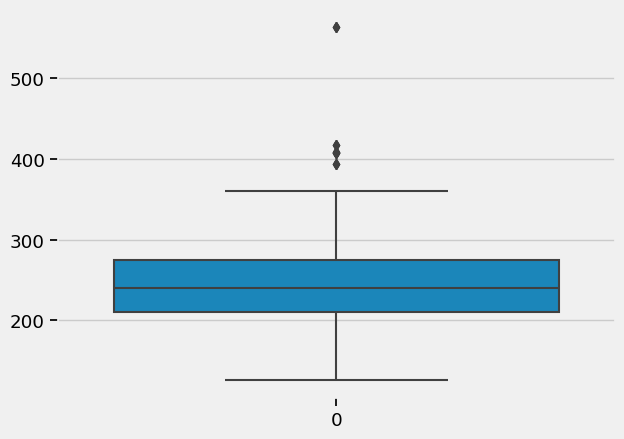

In [23]:
#outliers
sns.boxplot(data['Serum Cholestoral (chol) mg/dl'])
plt.show()

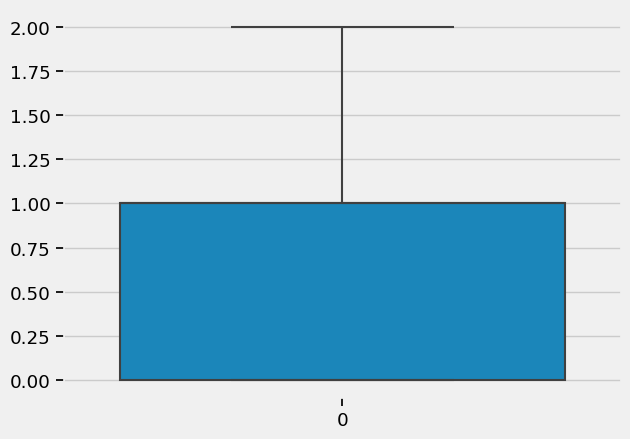

In [24]:
#outliers
sns.boxplot(data['Resting Electrocardiographic Results (restecg)'])
plt.show()

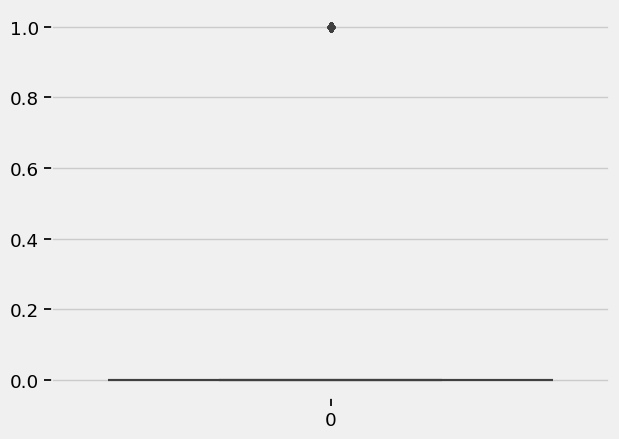

In [25]:
#outliers
sns.boxplot(data['Fasting Blood Sugar (fbs) > 120 mg/dl'])
plt.show()

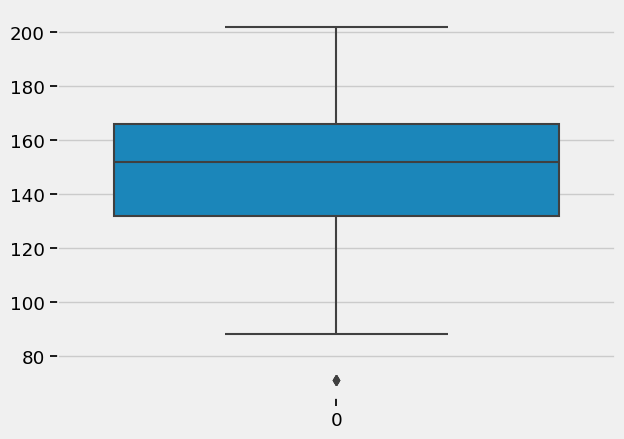

In [26]:
#outliers
sns.boxplot(data['Maximum Heart Rate Achieved (thalach)'])
plt.show()

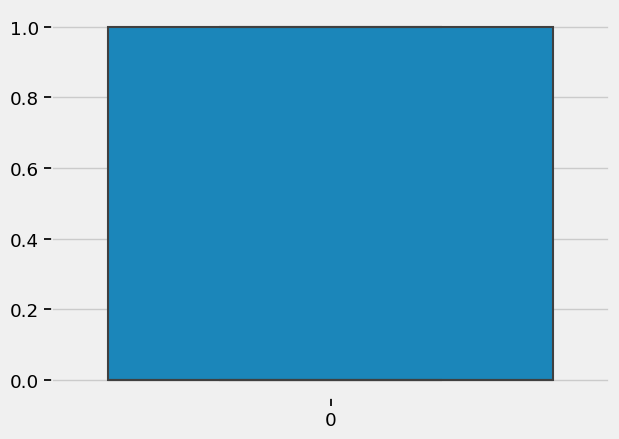

In [27]:
#outliers
sns.boxplot(data['Exercise Induced Angina (exang)'])
plt.show()

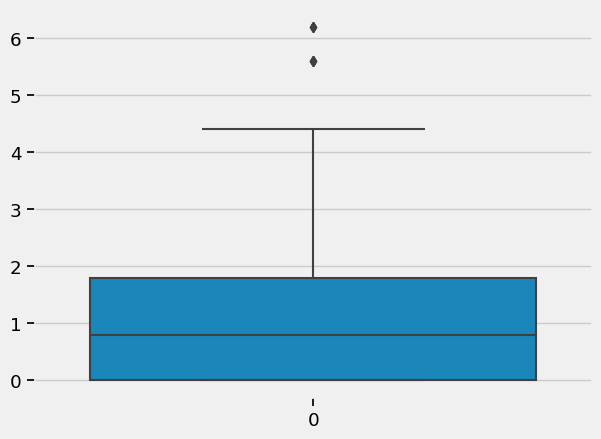

In [28]:
#outliers
sns.boxplot(data['ST depression (oldpeak)'])
plt.show()

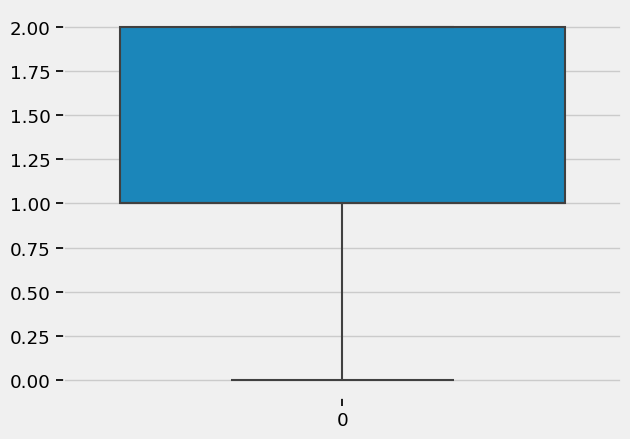

In [29]:
#outliers
sns.boxplot(data['Slope of the ST Segment (slope)'])
plt.show()

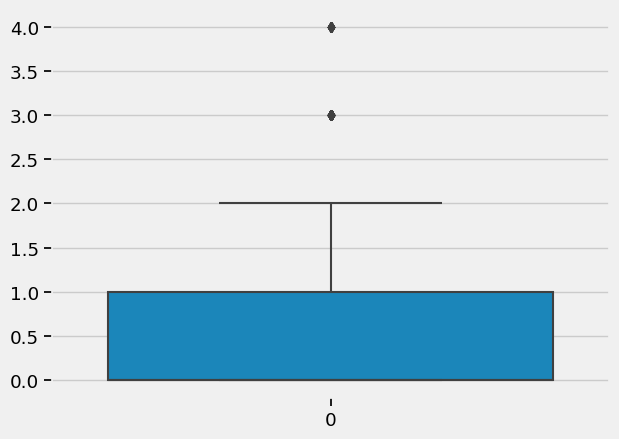

In [30]:
#outliers
sns.boxplot(data['Number of Major Vessels (ca)'])
plt.show()

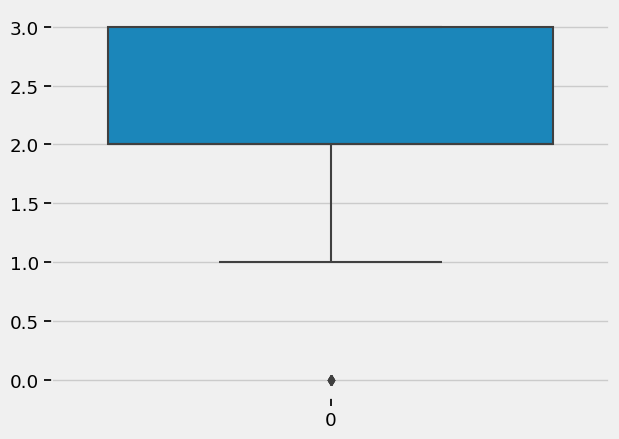

In [31]:
#outliers
sns.boxplot(data['Thal'])
plt.show()

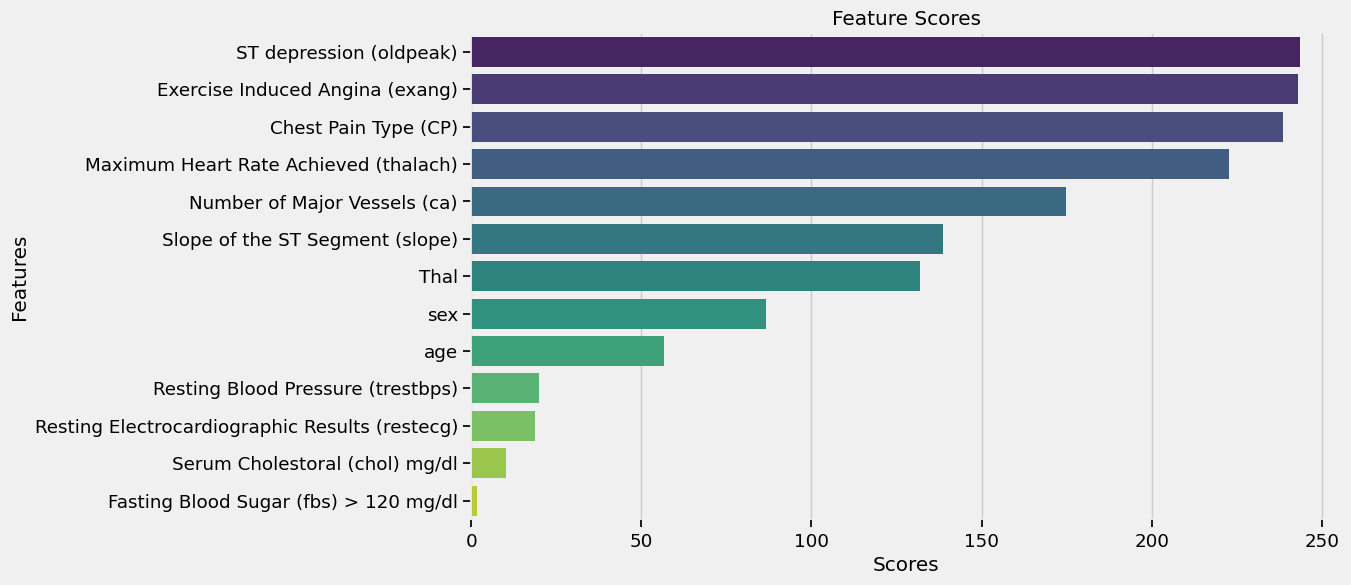

In [32]:
#There is no outliears
# Feature selection using SelectKBest with ANOVA F-value
X = data.drop(["target"], axis = 1)  
y = data["target"] 
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

# Feature Selection

In [33]:
  X = X.drop(["Fasting Blood Sugar (fbs) > 120 mg/dl","Serum Cholestoral (chol) mg/dl",
            "Resting Electrocardiographic Results (restecg)","Resting Blood Pressure (trestbps)"], axis = 1)  

In [34]:
X.columns

Index(['age', 'sex', 'Chest Pain Type (CP)',
       'Maximum Heart Rate Achieved (thalach)',
       'Exercise Induced Angina (exang)', 'ST depression (oldpeak)',
       'Slope of the ST Segment (slope)', 'Number of Major Vessels (ca)',
       'Thal'],
      dtype='object')

In [35]:
#Scale all values for good Accuracy
sc = StandardScaler()
col = ['age',
       'sex',
       'Chest Pain Type (CP)',
       'Thal',
       'Exercise Induced Angina (exang)',
       'Slope of the ST Segment (slope)',
       'Number of Major Vessels (ca)',
       'Maximum Heart Rate Achieved (thalach)', 
       'ST depression (oldpeak)']
X[col] = sc.fit_transform(X[col])
X.head()

age       sex  Chest Pain Type (CP)  \
0 -0.268437  0.661504             -0.915755   
1 -0.158157  0.661504             -0.915755   
2  1.716595  0.661504             -0.915755   
3  0.724079  0.661504             -0.915755   
4  0.834359 -1.511706             -0.915755   

   Maximum Heart Rate Achieved (thalach)  Exercise Induced Angina (exang)  \
0                               0.821321                        -0.712287   
1                               0.255968                         1.403928   
2                              -1.048692                         1.403928   
3                               0.516900                        -0.712287   
4                              -1.874977                        -0.712287   

   ST depression (oldpeak)  Slope of the ST Segment (slope)  \
0                -0.060888                         0.995433   
1                 1.727137                        -2.243675   
2                 1.301417                        -2.243675   
3                -0.912329                         0.995433   
4                 0.705408                        -0.624121   

   Number of Major Vessels (ca)      Thal  
0                      1.209221  1.089852  
1                     -0.731971  1.089852  
2                     -0.731971  1.089852  
3                      0.238625  1.089852  
4                      2.179817 -0.522122

In [36]:
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)  

# KNN Using Grid Search

In [37]:
clf_knn=KNeighborsClassifier()
parametrs_knn={'n_neighbors':[1,3,5,7,9,11], 'metric':['euclidean','manhattan','chebyshev']}
grid_clf_knn=GridSearchCV(clf_knn, parametrs_knn, cv=6, n_jobs=-1)
grid_clf_knn.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [38]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(X_test)

# Best Model for Heart 

In [39]:
print("KNN Best parameters: ", grid_clf_knn.best_params_)

KNN Best parameters:  {'metric': 'manhattan', 'n_neighbors': 1}


In [40]:
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_test, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=1) :  0.9902597402597403
classification_report for model KNeighborsClassifier(metric='manhattan', n_neighbors=1) : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



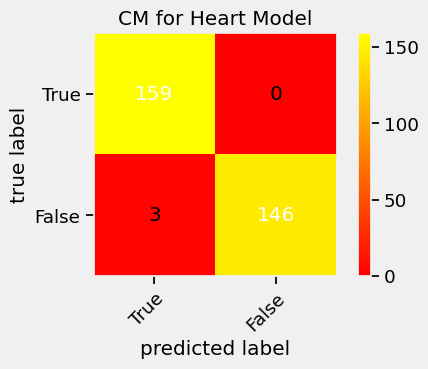

In [41]:
cm_rnf = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='autumn',
                               class_names = [True , False ],
                               figsize=(5, 3))
plt.title("CM for Heart Model")
plt.show()

In [42]:
clf_rnf=RandomForestClassifier()
parametrs_rnf={'n_estimators':[3,5,7,10], 'max_depth':[2,3,4,5,6]}
grid_forest=GridSearchCV(clf_rnf, parametrs_rnf, cv=6, n_jobs=-1)
grid_forest.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [3, 5, 7, 10]})

In [43]:
best_model_rnf=grid_forest.best_estimator_
y_pred_rnf=best_model_rnf.predict(X_test)

In [44]:
cm_rnf = confusion_matrix(y_test, y_pred_rnf)
print("Confution matrix for model " f'{best_model_rnf} : \n',cm_rnf)
ac_rnf = accuracy_score(y_test, y_pred_rnf)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)
cr_rnf = classification_report(y_test, y_pred_rnf)
print("classification_report for model " f'{best_model_rnf} : \n',cr_rnf)

Confution matrix for model RandomForestClassifier(max_depth=6, n_estimators=10) : 
 [[135  24]
 [  1 148]]
Accuracy score for model RandomForestClassifier(max_depth=6, n_estimators=10) :  0.9188311688311688
classification_report for model RandomForestClassifier(max_depth=6, n_estimators=10) : 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92       159
           1       0.86      0.99      0.92       149

    accuracy                           0.92       308
   macro avg       0.93      0.92      0.92       308
weighted avg       0.93      0.92      0.92       308



In [45]:
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
print("Accuracy score for model " f'{best_model_rnf} : ',ac_rnf)

Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=1) :  0.9902597402597403
Accuracy score for model RandomForestClassifier(max_depth=6, n_estimators=10) :  0.9188311688311688


In [46]:
best_model_knn.score(X_test,y_test)

0.9902597402597403

In [47]:
best_model_knn.score(X_train,y_train)

1.0

In [48]:
#Use KNN (best accuracy score) for creating a prediction column 
y_pred_final = best_model_knn.predict(X_test)
X_test['predictions'] = y_pred_final 

In [49]:
X_test

age       sex  Chest Pain Type (CP)  \
527  0.834359 -1.511706             -0.915755   
359 -0.158157 -1.511706              1.027618   
447  0.062402  0.661504             -0.915755   
31  -0.488996 -1.511706              0.055931   
621 -0.709555  0.661504             -0.915755   
..        ...       ...                   ...   
668 -2.804866  0.661504              0.055931   
239  0.834359 -1.511706             -0.915755   
312  1.716595  0.661504              1.027618   
211  1.385757  0.661504             -0.915755   
861  1.054918  0.661504              1.027618   

     Maximum Heart Rate Achieved (thalach)  Exercise Induced Angina (exang)  \
527                               0.603877                        -0.712287   
359                              -1.483579                        -0.712287   
447                              -0.178919                         1.403928   
31                                0.560389                        -0.712287   
621                               0.038525                         1.403928   
..                                     ...                              ...   
668                               2.299935                        -0.712287   
239                               0.212479                         1.403928   
312                              -1.614045                         1.403928   
211                              -1.048692                         1.403928   
861                               0.386434                        -0.712287   

     ST depression (oldpeak)  Slope of the ST Segment (slope)  \
527                -0.912329                         0.995433   
359                -0.912329                         0.995433   
447                -0.231177                        -0.624121   
31                  0.024256                         0.995433   
621                -0.912329                         0.995433   
..                       ...                              ...   
668                -0.912329                         0.995433   
239                 0.279688                        -0.624121   
312                 1.556849                        -0.624121   
211                -0.146032                        -0.624121   
861                -0.912329                         0.995433   

     Number of Major Vessels (ca)      Thal  predictions  
527                     -0.731971 -0.522122            1  
359                     -0.731971 -3.746070            1  
447                      0.238625  1.089852            0  
31                      -0.731971 -0.522122            1  
621                      1.209221  1.089852            0  
..                            ...       ...          ...  
668                     -0.731971 -0.522122            1  
239                     -0.731971 -0.522122            0  
312                      0.238625  1.089852            0  
211                      1.209221 -0.522122            0  
861                     -0.731971 -0.522122            0  

[308 rows x 10 columns]

# Test my Model with new dataset

In [50]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 526), (1, 526)]


In [51]:
y_pred_knn=best_model_knn.predict(X_resampled)

In [52]:
ac_knn = accuracy_score(y_resampled, y_pred_knn)
print("Accuracy score for model " f'{best_model_knn} : ',ac_knn)
cr_knn = classification_report(y_resampled, y_pred_knn)
print("classification_report for model " f'{best_model_knn} : \n',cr_knn)

Accuracy score for model KNeighborsClassifier(metric='manhattan', n_neighbors=1) :  0.997148288973384
classification_report for model KNeighborsClassifier(metric='manhattan', n_neighbors=1) : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       526
           1       1.00      0.99      1.00       526

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



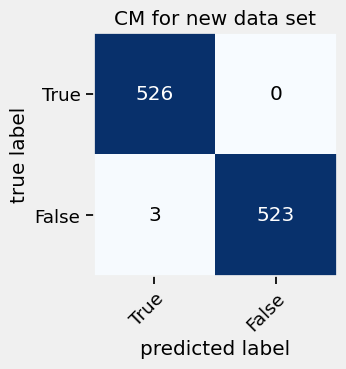

In [53]:
cm_rnf = confusion_matrix(y_resampled, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf , show_absolute=True, class_names = [True , False ],figsize=(5, 3))
plt.title('CM for new data set')
plt.show()

# Saving the model

In [54]:
pickle.dump(best_model_knn, open('model.pkl' , 'wb'))
model = pickle.load(open('model.pkl' , 'rb'))